# PyTorch

## 人工神经网络 VS 生物神经网络

科学家们通过长久的探索，想让计算机像人一样思考，所以研发了人工神经网络，它究竟和我们的神经网络有多像?

### 生物神经网络

900亿神经细胞组成了我们复杂的神经网络系统，这个数量甚至可以和宇宙中的星球数相比较。如果仅仅靠单个的神经元，是永远没有办法让我们像今天一样，完成各种任务，处理各种复杂的问题。那我们是如何靠这些神经元来解决问题的呢? 

初始时期（婴儿），神经元并没有形成系统和网络，可能只是一些分散的细胞而已。当我们初次品尝糖果的时候，美妙的感觉，让我们的候神经元开始产生联结，记忆形成。我们的手和嘴产生了某种特定的搭配：每次发现有糖果的时候，某种生物信号就会从我们的嘴，通过之前形成的神经联结，传递到手上，让手的动作变得有意义！

### 人工神经网络

替代生物神经网络的是已经成体系的人工神经网络。所有神经元之间的连接都是固定不可更换的，在人工神经网络里，没有凭空产生新联结这回事。

人工神经网络典型的一种学习方式就是：我们已经知道吃到糖果时手会如何动，但是我们需要让神经网络学着帮我们做这件动手的事情。

我们预先准备好非常多吃糖的学习数据，然后将这些数据一次次放入这套人工神经网络系统中，糖的信号会通过这套系统传递到手，然后通过对比这次信号传递后手的动作是不是“讨糖”动作，来修改人工神经网络当中的*神经元强度*。

这种修改在专业术语中叫做“**误差反向传递**”，也可以看作是再一次将传过来的信号传回去, 看看这个负责传递信号神经元对于”讨糖”的动作是否有贡献，让它好好反思与改正，争取下次做出更好的贡献。

### 对比

人工神经网络靠的是*正向*和*反向*传播来*更新神经元*，从而形成一个*好的神经系统*。本质上，这是一个**能让计算机处理和优化的数学模型**。

生物神经网络是通过*刺激*，*产生新的联结*，让信号能够通过新的联结传递而*形成反馈*。我们身体里的神经系统经过了数千万年的进化，迄今为止，再庞大的人工神经网络系统也不能替代我们的小脑袋！

人工神经网络和生物神经网络不是一回事。:)


## why PyTorch

PyTorch 是 Torch 在 Python 上的衍生。 Torch 很好用, 但是 Lua 不是特别流行，有开发团队将 Lua 的 Torch 移植到了更流行的语言 Python 上，就有了 PyTorch 。

Torch 自称为神经网络界的 Numpy ，因为他能将 torch 产生的 tensor 放在 GPU 中加速运算 (前提是环境里有合适的 GPU)，就像 Numpy 会把 array 放在 CPU 中加速运算。

对比静态的 Tensorflow ，PyTorch 最大优点就是建立的神经网络是动态的，能更有效地处理一些问题。

## 安装

参考 [官方文档](https://pytorch.org/get-started/locally/)

```shell
# create a new env
conda create --name neuro --clone base
conda activate neuro
# install pytorch
conda install pytorch torchvision torchaudio -c pytorch
```

In [1]:
import torch
from torch.autograd import Variable
import numpy as np

In [2]:
# 安装验证

print("version:", torch.__version__)

x = torch.rand(5, 3)
print(x)

version: 1.12.1
tensor([[0.1852, 0.9428, 0.5576],
        [0.0998, 0.0774, 0.8203],
        [0.6203, 0.0214, 0.9622],
        [0.0645, 0.6226, 0.4835],
        [0.8105, 0.3259, 0.9833]])


In [3]:
# 检测 GPU 是否可用

torch.cuda.is_available()

False

<hr/>

矩阵乘法 matrix multiplication

In [4]:
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)

print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy:', np.matmul(data, data),
    '\ntorch:', torch.mm(tensor, tensor)
)


matrix multiplication (matmul) 
numpy: [[ 7 10]
 [15 22]] 
torch: tensor([[ 7., 10.],
        [15., 22.]])


In [5]:
tensor = torch.Tensor([1,2,3,4])
print(tensor)

print(tensor.dot(tensor))
# 变为
print(torch.dot(tensor, tensor))

tensor([1., 2., 3., 4.])
tensor(30.)
tensor(30.)


In [6]:
tensor = torch.Tensor([[1,2], [3,4]])

# 点乘 抛出错误
# torch.dot(tensor, tensor)
# RuntimeError: 1D tensors expected, but got 2D and 2D tensors

torch.matmul(tensor, tensor)

tensor([[ 7., 10.],
        [15., 22.]])

### Variable

In [7]:
tensor = torch.FloatTensor([[1, 2], [3, 4]])
# requires_grad 是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)

print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [8]:
t_out = torch.mean(tensor * tensor)

# 这步将在计算图中添加的一个计算步骤, 计算误差反向传递的时候有他一份功劳
v_out = torch.mean(variable * variable)

print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


上面这个步骤，看不出两种计算有什么区别。但事实上, Variable 计算时, 它在背景幕布后面一步步默默地搭建着一个庞大的系统, 叫做计算图 computational graph 。这个图是将所有的计算步骤 (节点) 都连接起来, 最后进行误差反向传递的时候, 一次性将所有 variable 里面的修改幅度 (梯度) 都计算出来, 而 tensor 就没有这个能力。

In [9]:
# v_out.backward()

# 初始 Variable 的梯度
print(variable.grad)

None


### 激励函数 Activation

一句话概括 Activation ：就是让神经网络可以描述非线性问题的步骤，是神经网络变得更强大。

Torch 中的激励函数有很多, 不过平时要用到的就这几个 `relu`, `sigmoid`, `tanh`, `softplus` 。

In [10]:
# 激励函数都在这
import torch.nn.functional as F

In [11]:
# 生成一些数据
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

In [12]:
# 为作图转换为 numpy array
x_np = x.data.numpy()

# 几种常用的 激励函数
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# softmax 它是关于概率的, 用于分类。比较特殊, 不能直接显示
y_softmax = F.softmax(x)


/var/folders/2x/gm9jcczn51950bylhpgf4ppm0000gp/T/ipykernel_4249/3423503608.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_softmax = F.softmax(x)


将几个激励函数的结果用图形显示出来

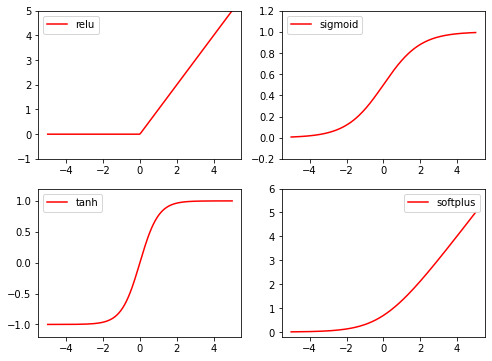

In [13]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()